In [95]:
import os
import math

import matplotlib.pyplot as plt

# importing configurations
from lpc import lpc
from fft import fft_real
from plot import plot_subplots
from pre_emphasis import pre_emphasis_filter
from config import fs, duration, channels, bit_depth
from hamming import hamming_window, apply_hamming_window

In [96]:
# change this to the path of the test record
# if empty, it will record a new file
file_name = 'record_20251007_142931.wav'
alif_start = 12800
waw_start = 24000
ya_start = 36000

# step 00: recording audio

In [97]:
from recorder import record, load_audio

# Record the word
if file_name == "" or file_name == None:
    print("You did not specify any file, recording new...")
    audio, fs, file_name = record(fs, duration, channels, bit_depth)
elif not os.path.exists(file_name):
    print(f"File {file_name} does not exist, recording new...")
    audio, fs, file_name = record(fs, duration, channels, bit_depth)
else:
    # file found, continue execution
    pass

print(f"loading record {file_name}", end="")
print(" Done.")
if fs == 0:
    print(f"Sampling rate (frequency) of the record {file_name} = 0, exit program.")
    exit(-2)

samples, fs = load_audio(file_name, fs)

# convert to list of floats
samples = [float(i) for i in samples]

if len(samples) == 0:
    print(f"{file_name} is empty, exit program.")
    exit(-3)

if not fs > 0:
    print(f"Error loading {file_name}, sampling rate is {fs}, exit program.")
    exit(-4)
duration = len(samples)/fs

print(f"Audio length: {len(samples)} samples")
print(f"Duration: {duration:.2f} seconds")
print(f"Sampling rate (frequency): {fs} Hz")

loading record record_20251007_142931.wav Done.
Successfully loaded audio: record_20251007_142931.wav
  Duration: 3.00 seconds
  Sampling rate: 16000 Hz
  Channels: 1
  Samples: 48000
Audio length: 48000 samples
Duration: 3.00 seconds
Sampling rate (frequency): 16000 Hz


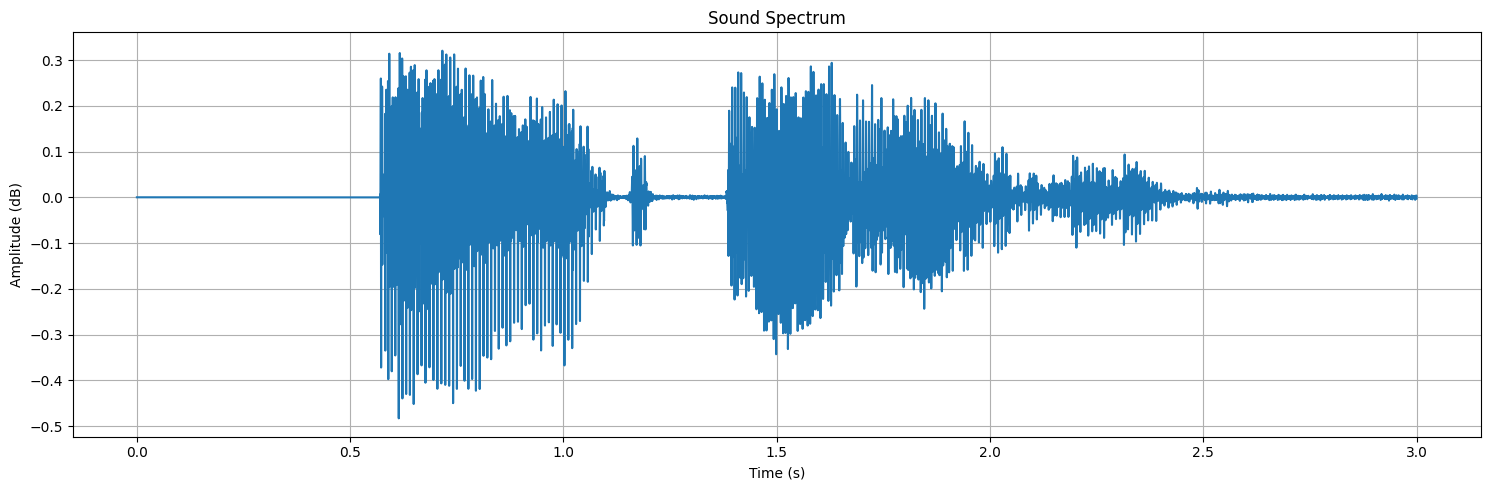

In [98]:
# plot record
time = [i * duration / len(samples) for i in range(len(samples))]
# plot record
plt.figure(figsize=(15, 5))
plt.title('Sound Spectrum')
plt.xlabel('Time (s)')  # Changed from ms to seconds
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.tight_layout()
plt.plot(
    time,
    samples,
)
plt.savefig(f'{file_name}_spectrum.png', dpi=300, bbox_inches='tight')
plt.show()

# step 01: extract vowel windows and plot

In [99]:

window_duration_ms = 30
window_length = int(window_duration_ms / 1000 * fs)
print(f"Window length: {window_length} samples, {window_duration_ms} ms")

# extract windows
alif_window = samples[alif_start:alif_start+window_length]
waw_window = samples[waw_start:waw_start+window_length]
ya_window = samples[ya_start:ya_start+window_length]

print(f"""# Windows:
-----------------------------------------------------------
      alif: [{alif_start}:{alif_start+window_length}] samples, [{alif_start/fs*1000:.2f}:{(alif_start+window_length)/fs*1000:.2f}] ms
      waw: [{waw_start}:{waw_start+window_length}] samples, [{waw_start/fs*1000:.2f}:{(waw_start+window_length)/fs*1000:.2f}] ms
      ya: [{ya_start}:{ya_start+window_length}] samples, [{ya_start/fs*1000:.2f}:{(ya_start+window_length)/fs*1000:.2f}] ms
-----------------------------------------------------------
""")

Window length: 480 samples, 30 ms
# Windows:
-----------------------------------------------------------
      alif: [12800:13280] samples, [800.00:830.00] ms
      waw: [24000:24480] samples, [1500.00:1530.00] ms
      ya: [36000:36480] samples, [2250.00:2280.00] ms
-----------------------------------------------------------



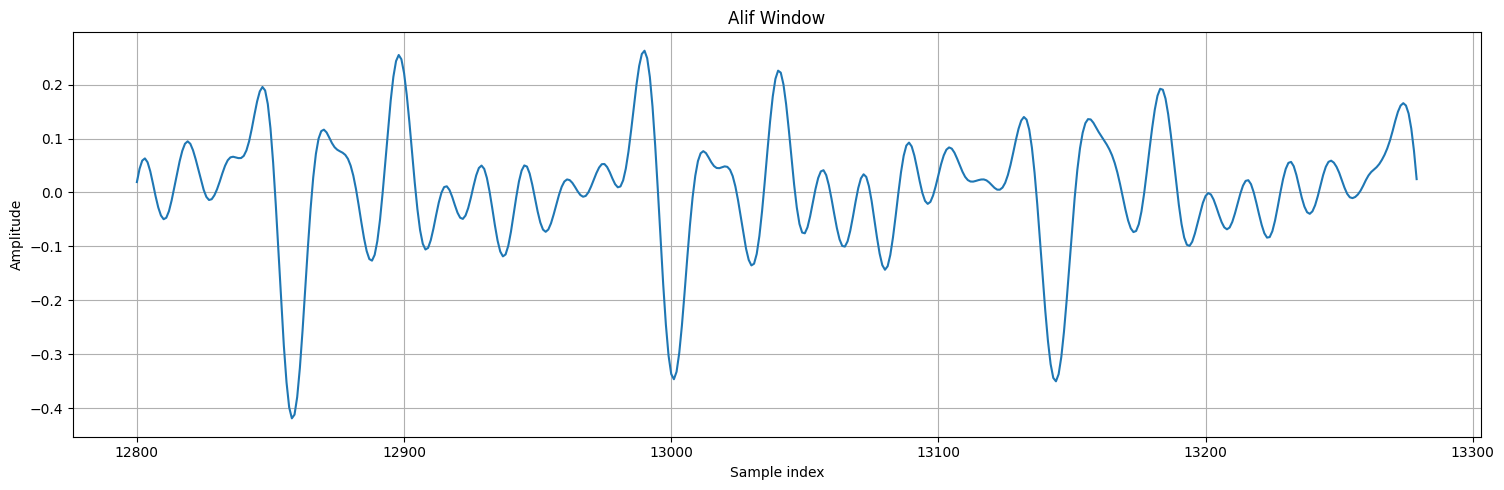

In [100]:
# Alif
plt.figure(figsize=(15, 5))
plt.title('Alif Window')
plt.xlabel('Sample index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.plot(
    [i for i in range(alif_start, alif_start+window_length)],
    alif_window
)
plt.savefig(f'alif_window_{file_name}.png')
plt.show()

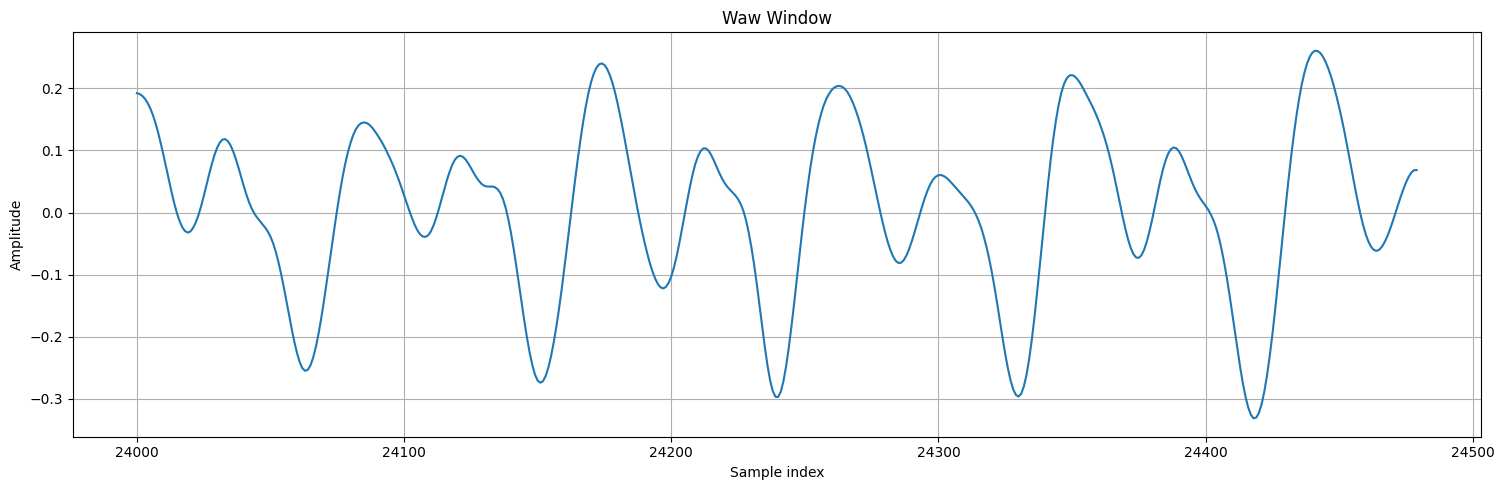

In [101]:
# Waw
plt.figure(figsize=(15, 5))
plt.title('Waw Window')
plt.xlabel('Sample index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.plot(
    [i for i in range(waw_start, waw_start+window_length)],
    waw_window
)
plt.savefig(f'waw_window_{file_name}.png')
plt.show()

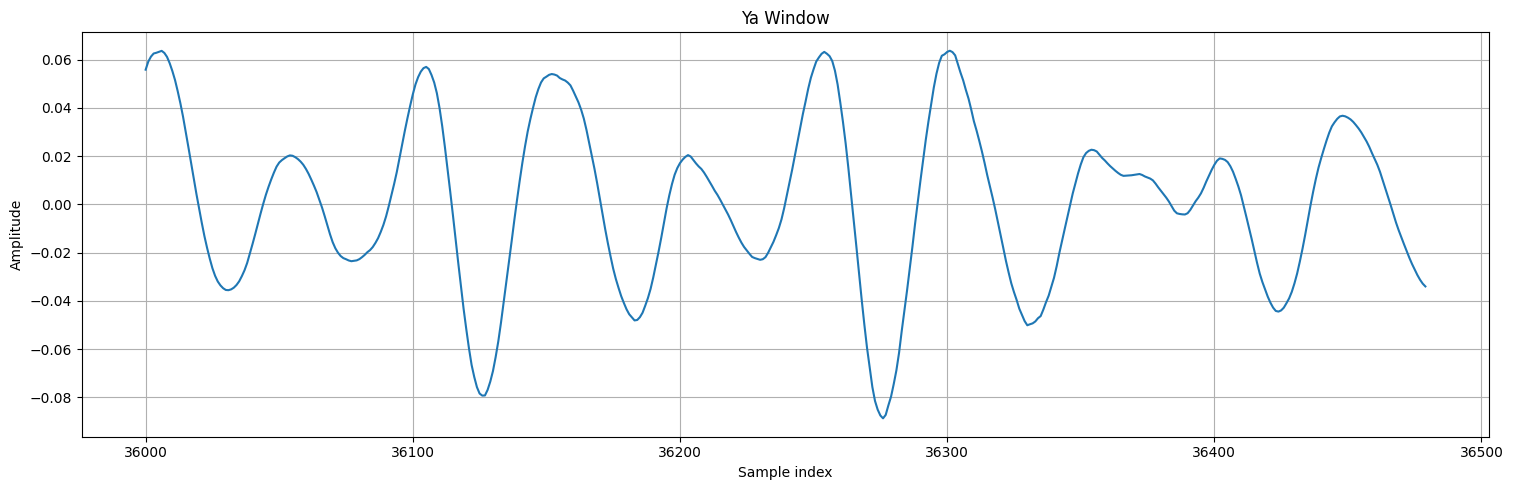

In [102]:
# Ya
plt.figure(figsize=(15, 5))
plt.title('Ya Window')
plt.xlabel('Sample index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.plot(
    [i for i in range(ya_start, ya_start+window_length)],
    ya_window
)
plt.savefig(f'ya_window_{file_name}.png')
plt.show()

# step 02: f0 - fundemental period

In [133]:
from autocorrelation import fi_correlation, correlations

f0_alif, phi_alif, k_alif = fi_correlation(alif_window, fs, 1)
f0_waw, phi_waw, k_waw = fi_correlation(waw_window, fs, 1)
f0_ya, phi_ya, k_ya = fi_correlation(ya_window, fs, 1)

# show results
print(f"""
# fundemental frequency - f0 (Hz):
--------------------------------------
            f0 (Hz)    Ti (sec)
    Alif    {round(f0_alif, 2):5}     {phi_alif}
    Waw     {round(f0_waw, 2):5}     {phi_waw}
    Ya      {round(f0_ya, 2):5}     {phi_ya}
--------------------------------------
""")


# fundemental frequency - f0 (Hz):
--------------------------------------
            f0 (Hz)    Ti (sec)
    Alif    111.89     0.0089375
    Waw     181.82     0.0055
    Ya      108.84     0.0091875
--------------------------------------



In [134]:
# plot correlations
corr_alif = correlations(alif_window)
corr_waw = correlations(waw_window)
corr_ya = correlations(ya_window)

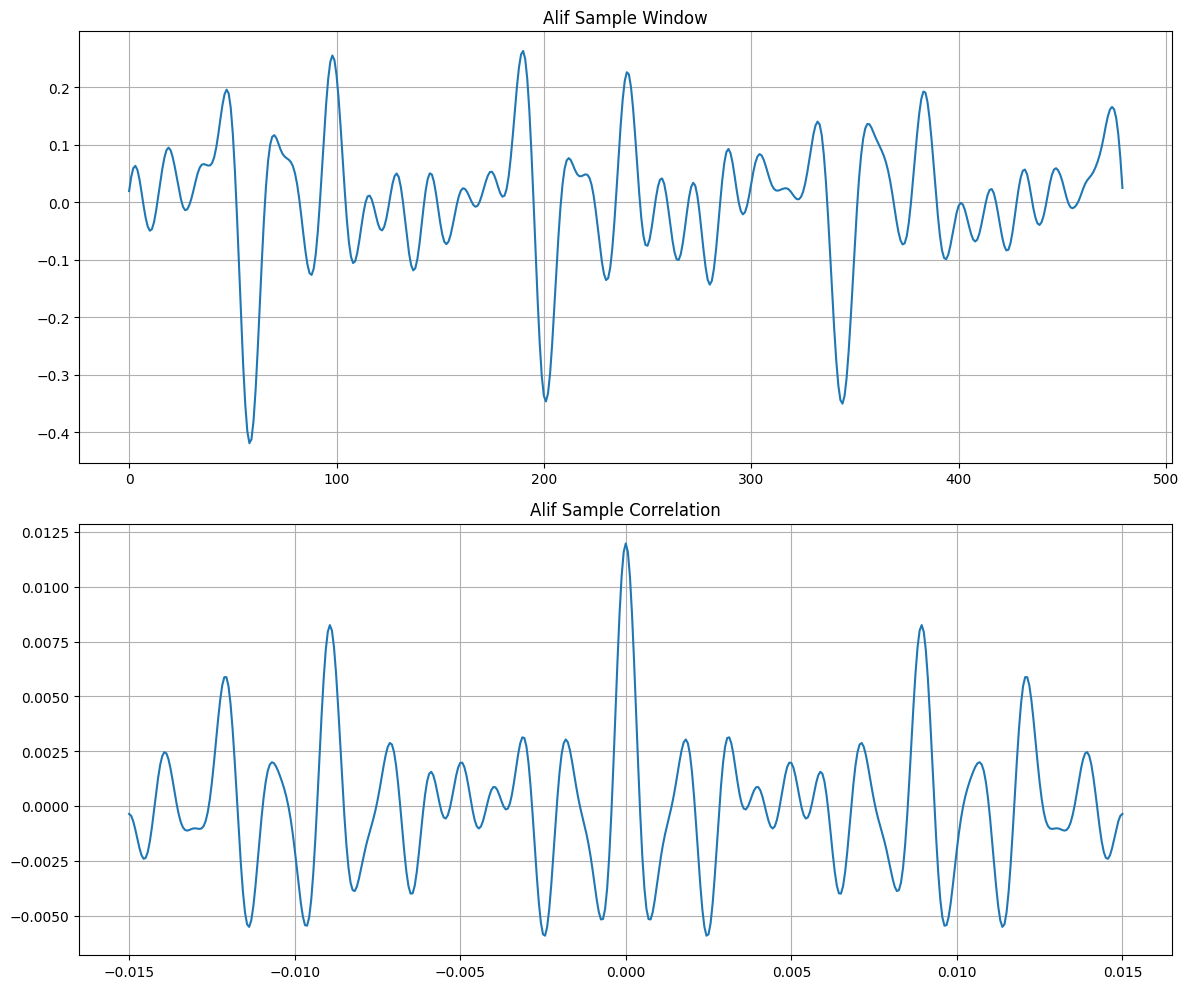

In [135]:
# Alif
plot_subplots(
    None,
    [
        {'data': [i for i in range(len(alif_window))],},
        {'data': [i / fs for i in range(-len(corr_alif)//2+1, len(corr_alif)//2+1)],},
    ], 
    [
        {'data': alif_window, 'title': 'Alif Sample Window', 'grid': True},
        {'data': corr_alif, 'title': 'Alif Sample Correlation', 'grid': True},
    ]
)

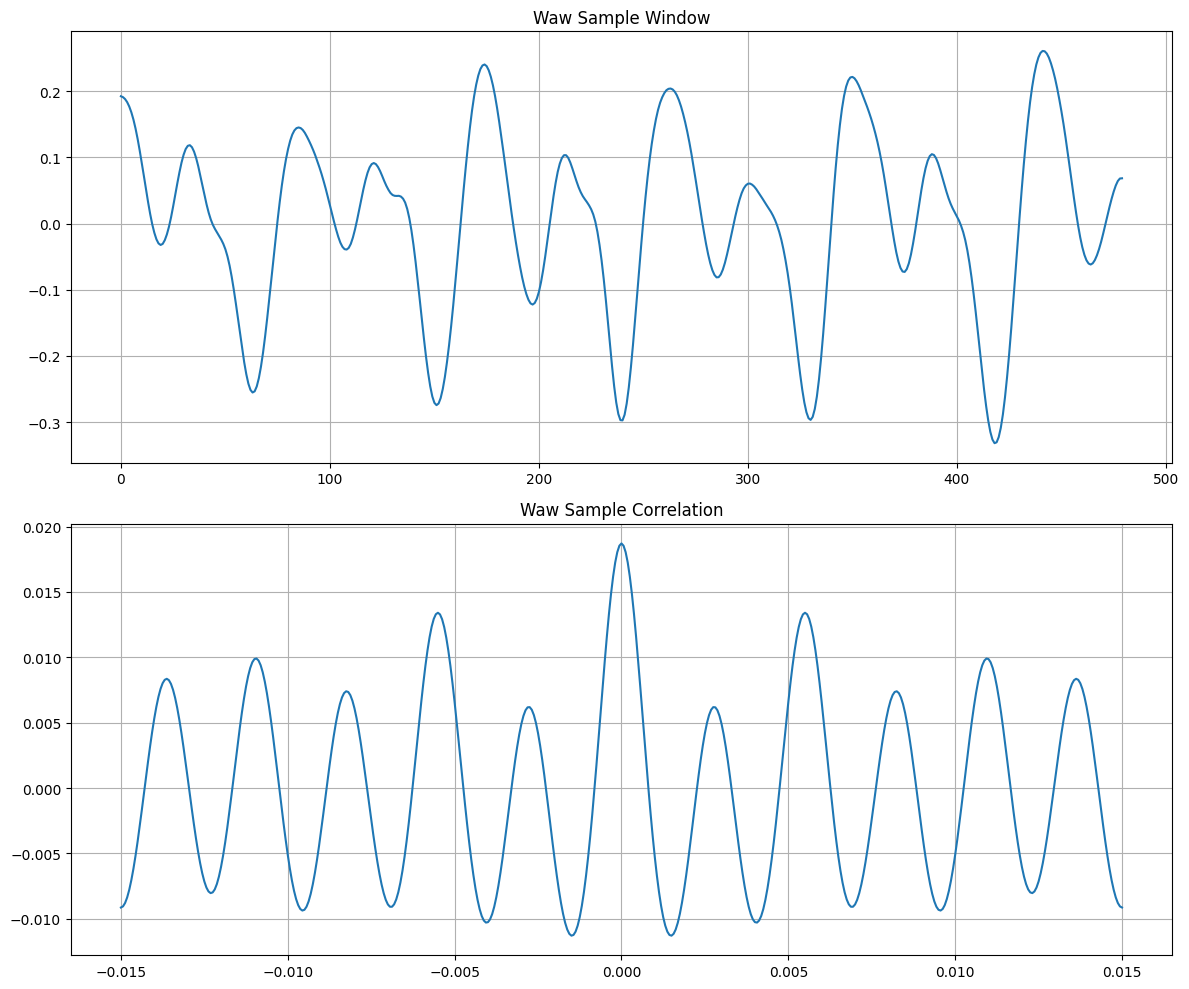

In [136]:
# Waw
plot_subplots(
    None,
    [
        {'data': [i for i in range(len(waw_window))],},
        {'data': [i / fs for i in range(-len(corr_waw)//2+1, len(corr_waw)//2+1)],},
    ], 
    [
        {'data': waw_window, 'title': 'Waw Sample Window', 'grid': True},
        {'data': corr_waw, 'title': 'Waw Sample Correlation', 'grid': True},
    ]
)

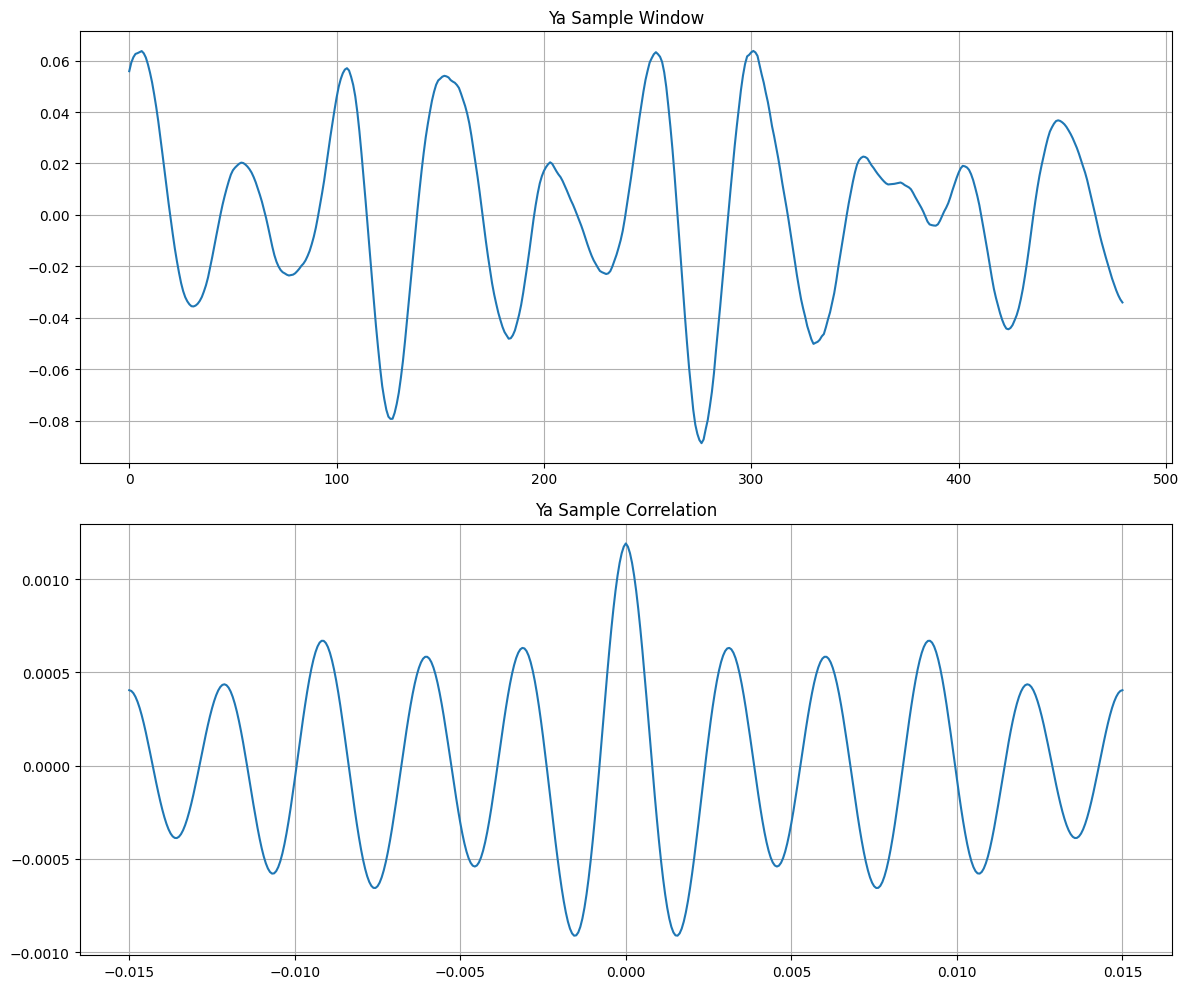

In [137]:
# Ya
plot_subplots(
    None, 
    [
        {'data': [i for i in range(len(ya_window))],},
        {'data': [i / fs for i in range(-len(corr_ya)//2+1, len(corr_ya)//2+1)],},
    ], 
    [
        {'data': ya_window, 'title': 'Ya Sample Window', 'grid': True},
        {'data': corr_ya, 'title': 'Ya Sample Correlation', 'grid': True},
    ]
)

# step 03: hamming

In [138]:
# Generate Hamming window - raise error if generation fails
ham = hamming_window(window_length)
if ham is None:
    raise ValueError(f"Hamming window generation failed for window length: {window_length}")

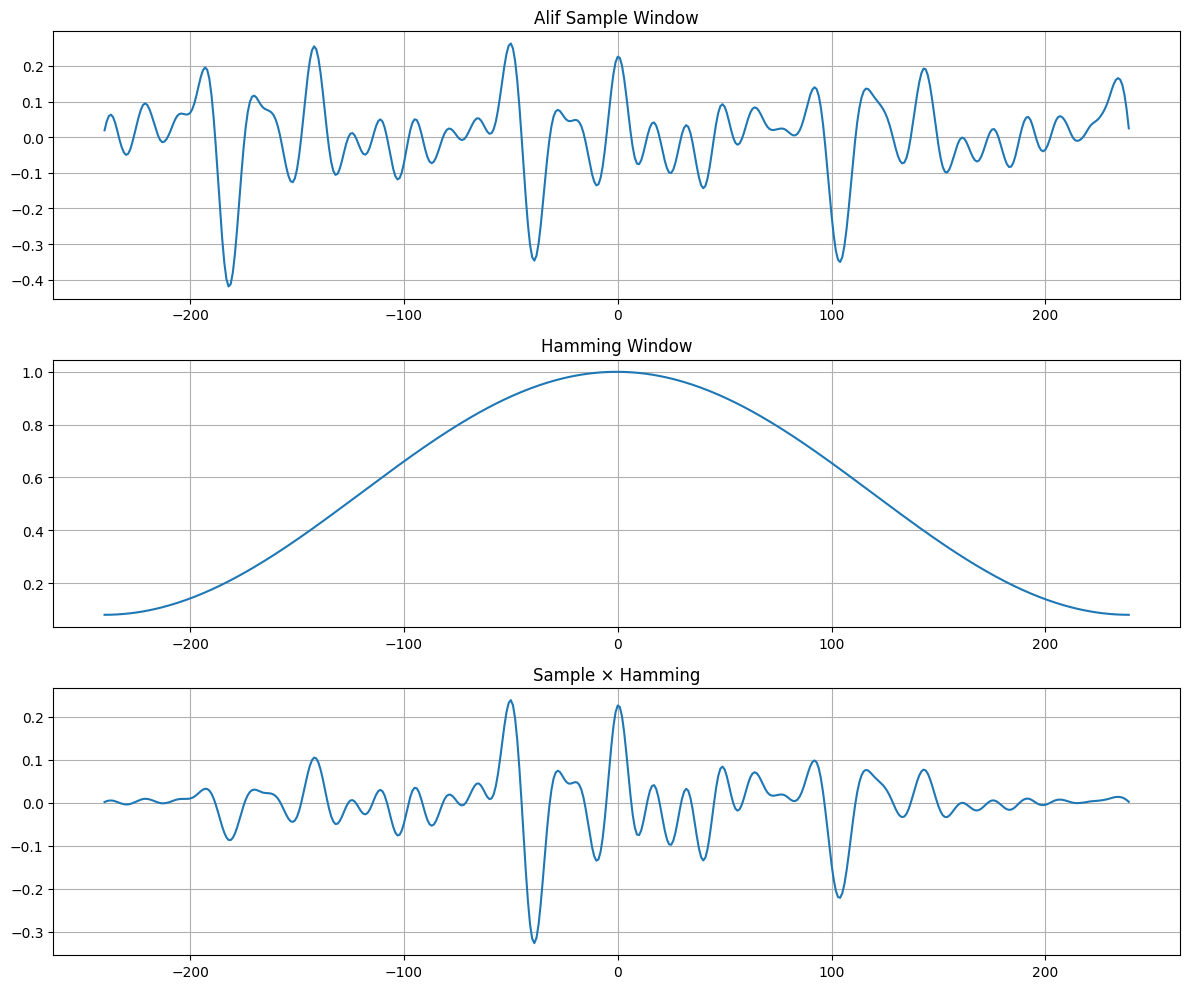

In [139]:
# Alif
# ------------------------------------
# Apply Hamming window to the signal - raise error if application fails
alif_hamming = apply_hamming_window(alif_window)
if alif_hamming is None:
    raise ValueError(f"Hamming window application failed for signal of length: {len(alif_window)}")

# Create x-axis ranges for each subplot
# Center the x-axis around zero for better visualization
x_axis_alif = [i for i in range(-len(alif_window)//2, len(alif_window)//2)]
x_axis_ham = [i for i in range(-len(ham)//2, len(ham)//2)]
x_axis_result = [i for i in range(-len(alif_hamming)//2, len(alif_hamming)//2)]

# Generate subplots to visualize the signal processing steps
plot_subplots(
    None,
    [
        {'data': x_axis_alif,},      # X-axis for original signal
        {'data': x_axis_ham,},       # X-axis for Hamming window
        {'data': x_axis_result,},    # X-axis for windowed result
    ], 
    [
        {'data': alif_window, 'title': 'Alif Sample Window', 'grid': True},        # Original signal
        {'data': ham, 'title': 'Hamming Window', 'grid': True},               # Hamming window coefficients
        {'data': alif_hamming, 'title': 'Sample × Hamming', 'grid': True},    # Windowed signal result
    ]
)

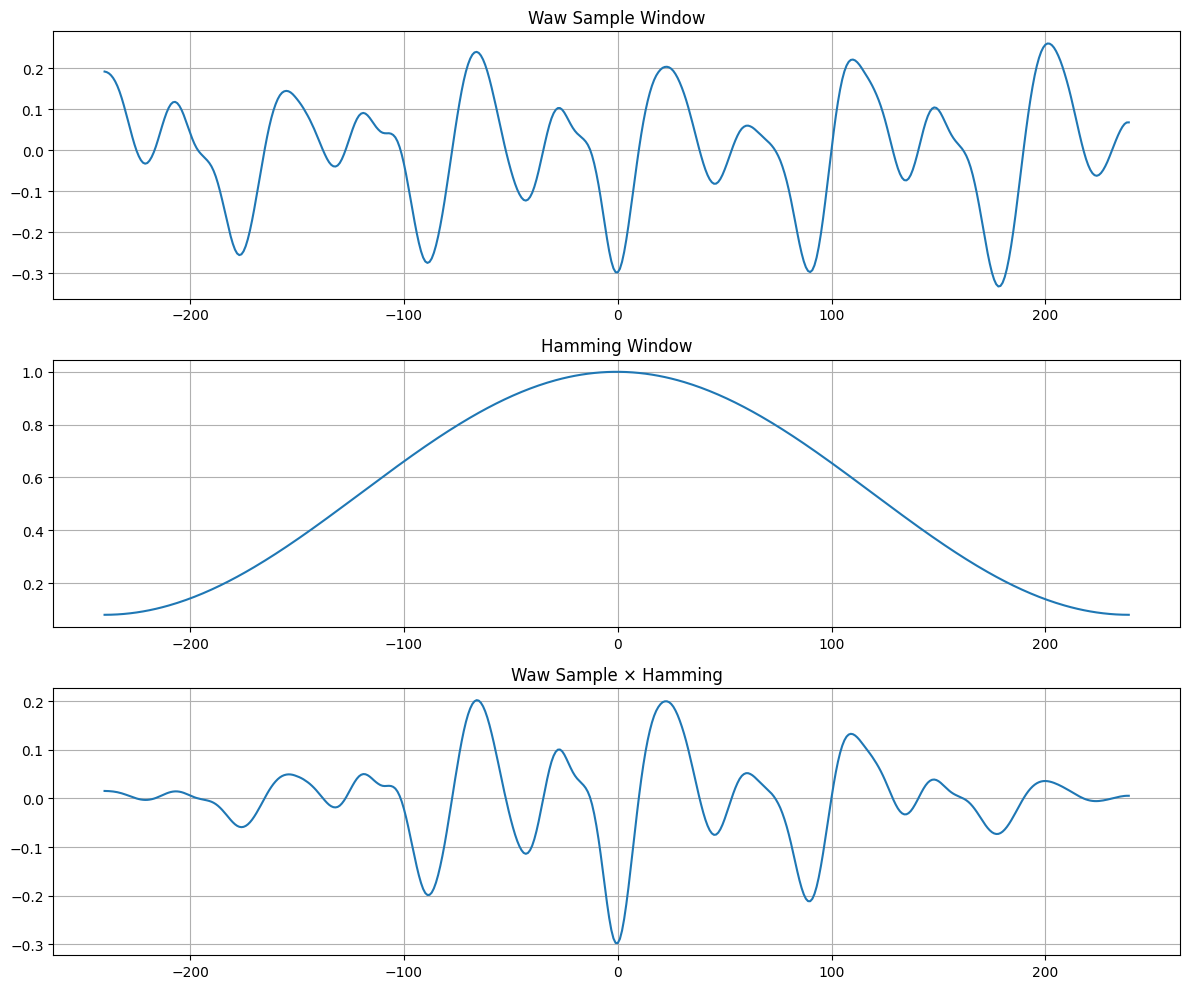

In [140]:
# Waw
# ------------------------------------
# Apply Hamming window to the signal - raise error if application fails
waw_hamming = apply_hamming_window(waw_window)
if waw_hamming is None:
    raise ValueError(f"Hamming window application failed for signal of length: {len(waw_window)}")

# Create x-axis ranges for each subplot
# Center the x-axis around zero for better visualization
x_axis_alif = [i for i in range(-len(waw_window)//2, len(waw_window)//2)]
x_axis_ham = [i for i in range(-len(ham)//2, len(ham)//2)]
x_axis_result = [i for i in range(-len(waw_hamming)//2, len(waw_hamming)//2)]

# Generate subplots to visualize the signal processing steps
plot_subplots(
    None,
    [
        {'data': x_axis_alif,},      # X-axis for original signal
        {'data': x_axis_ham,},       # X-axis for Hamming window
        {'data': x_axis_result,},    # X-axis for windowed result
    ], 
    [
        {'data': waw_window, 'title': 'Waw Sample Window', 'grid': True},        # Original signal
        {'data': ham, 'title': 'Hamming Window', 'grid': True},               # Hamming window coefficients
        {'data': waw_hamming, 'title': 'Waw Sample × Hamming', 'grid': True},    # Windowed signal result
    ]
)

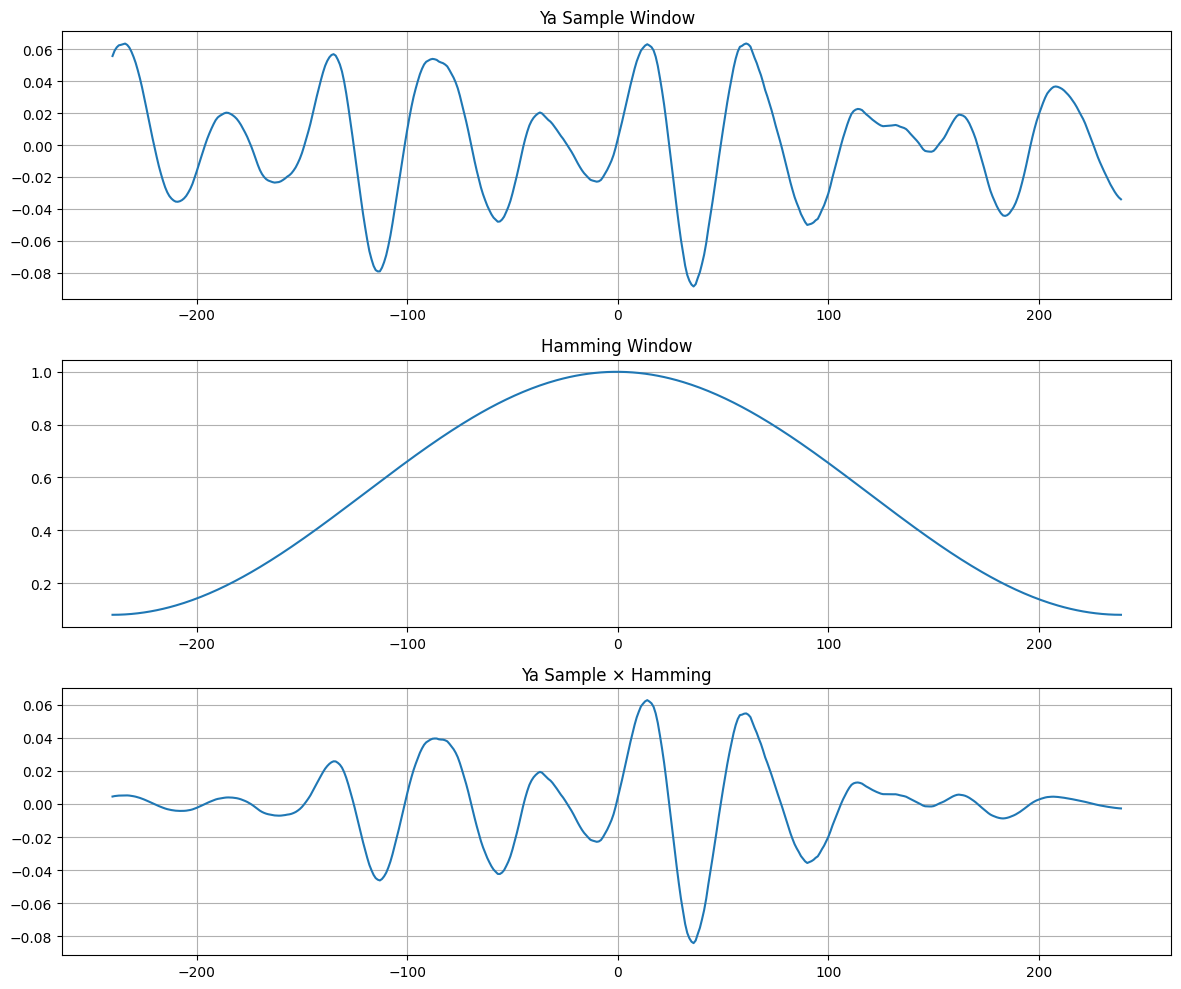

In [141]:
# Ya
# ------------------------------------
# Apply Hamming window to the signal - raise error if application fails
ya_hamming = apply_hamming_window(ya_window)
if ya_hamming is None:
    raise ValueError(f"Hamming window application failed for signal of length: {len(ya_window)}")

# Create x-axis ranges for each subplot
# Center the x-axis around zero for better visualization
x_axis_alif = [i for i in range(-len(ya_window)//2, len(ya_window)//2)]
x_axis_ham = [i for i in range(-len(ham)//2, len(ham)//2)]
x_axis_result = [i for i in range(-len(ya_hamming)//2, len(ya_hamming)//2)]

# Generate subplots to visualize the signal processing steps
plot_subplots(
    None,
    [
        {'data': x_axis_alif,},      # X-axis for original signal
        {'data': x_axis_ham,},       # X-axis for Hamming window
        {'data': x_axis_result,},    # X-axis for windowed result
    ], 
    [
        {'data': ya_window, 'title': 'Ya Sample Window', 'grid': True},        # Original signal
        {'data': ham, 'title': 'Hamming Window', 'grid': True},               # Hamming window coefficients
        {'data': ya_hamming, 'title': 'Ya Sample × Hamming', 'grid': True},    # Windowed signal result
    ]
)

# step 04: Pre-emphasis signal

In [142]:
alif_hamming_pre_emphasis = pre_emphasis_filter(alif_window, alpha=0.97)
waw_hamming_pre_emphasis = pre_emphasis_filter(waw_window, alpha=0.97)
ya_hamming_pre_emphasis = pre_emphasis_filter(ya_window, alpha=0.97)

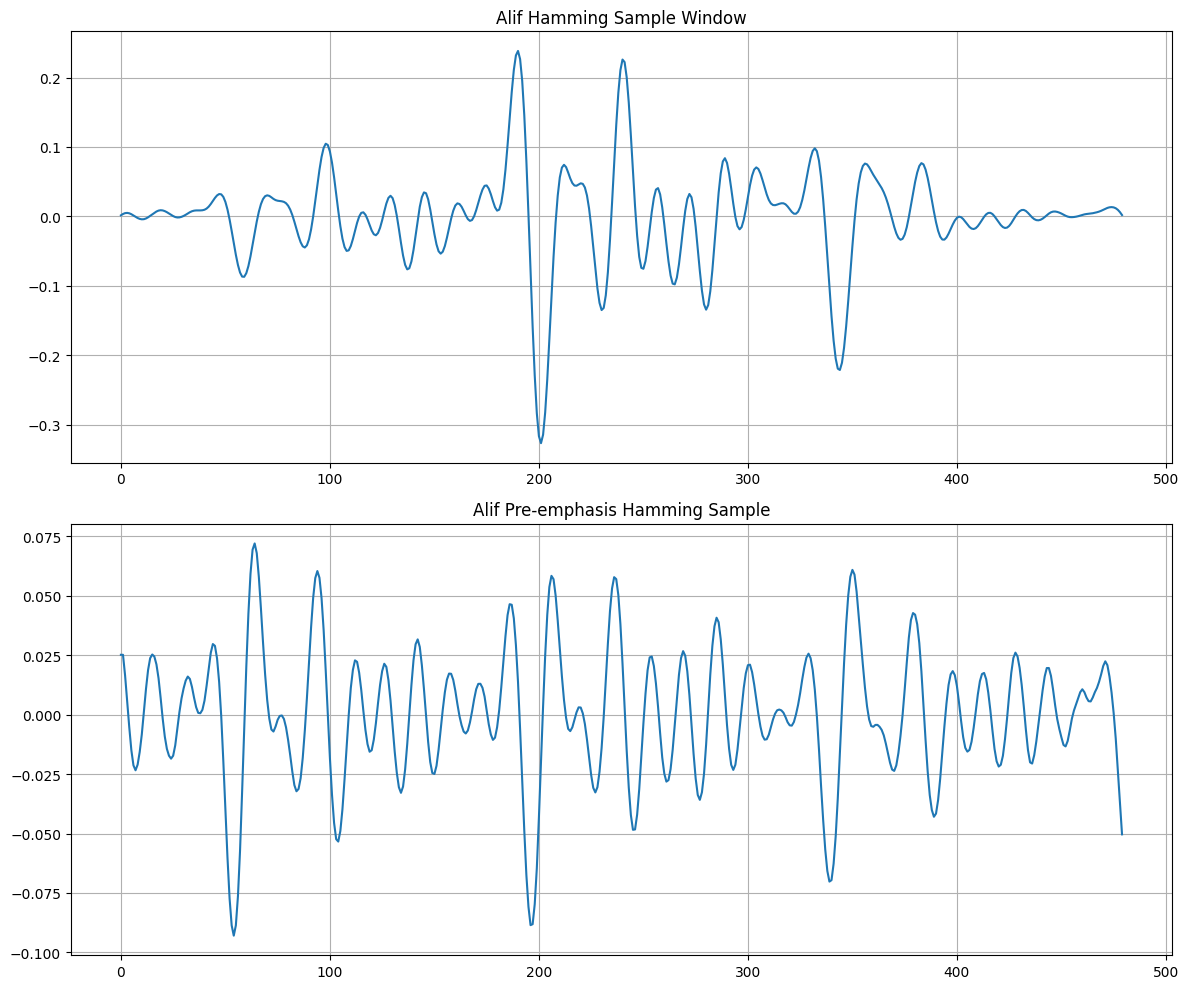

In [143]:
# Alif
plot_subplots(
    None,
    [
        {'data': [i for i in range(len(alif_hamming))],},
        {'data': [i for i in range(len(alif_hamming_pre_emphasis))],},
    ], 
    [
        {'data': alif_hamming, 'title': 'Alif Hamming Sample Window', 'grid': True},
        {'data': alif_hamming_pre_emphasis, 'title': 'Alif Pre-emphasis Hamming Sample', 'grid': True},
    ]
)

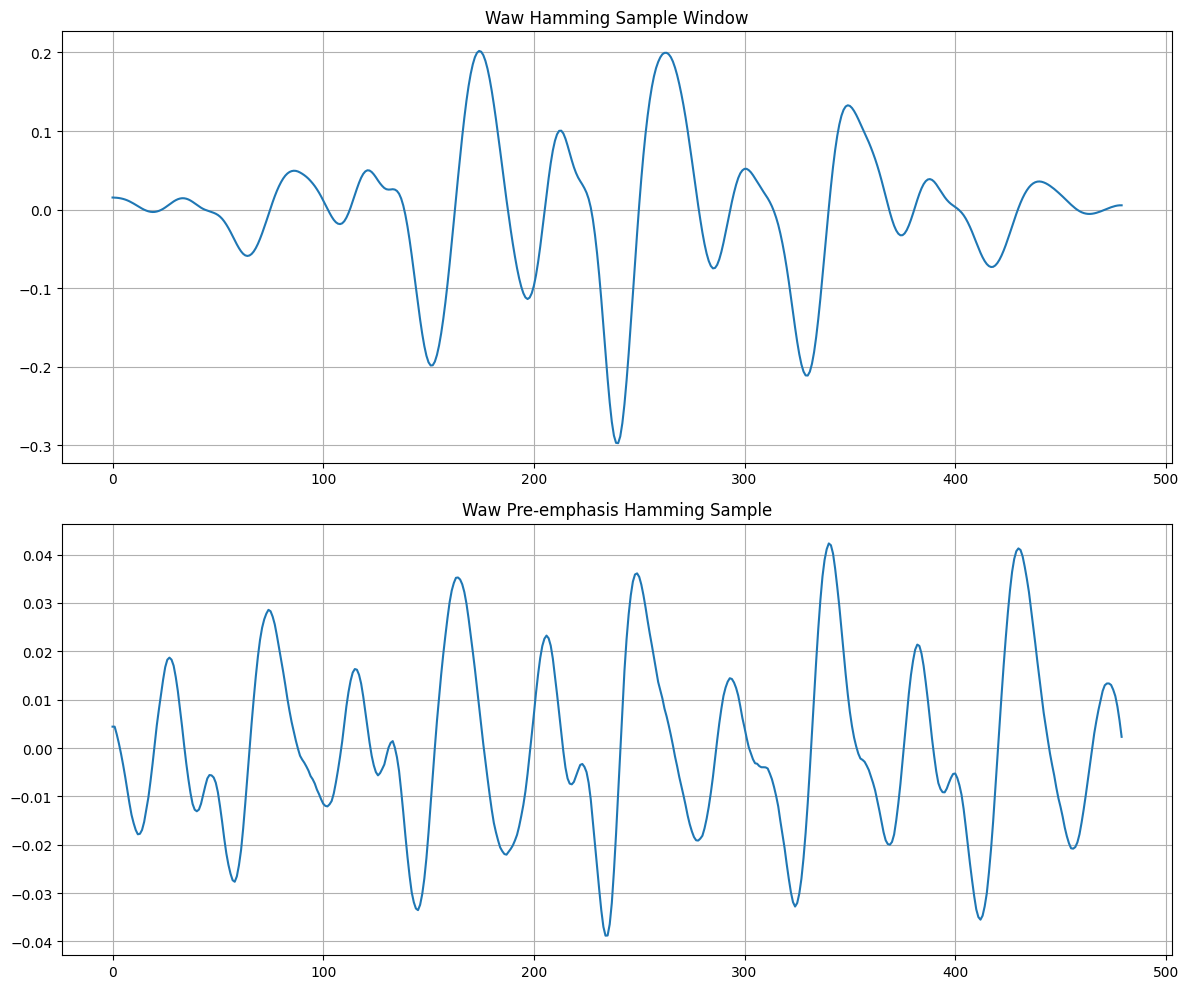

In [144]:
# Waw
plot_subplots(
    None,
    [
        {'data': [i for i in range(len(waw_hamming))],},
        {'data': [i for i in range(len(waw_hamming_pre_emphasis))],},
    ], 
    [
        {'data': waw_hamming, 'title': 'Waw Hamming Sample Window', 'grid': True},
        {'data': waw_hamming_pre_emphasis, 'title': 'Waw Pre-emphasis Hamming Sample', 'grid': True},
    ]
)

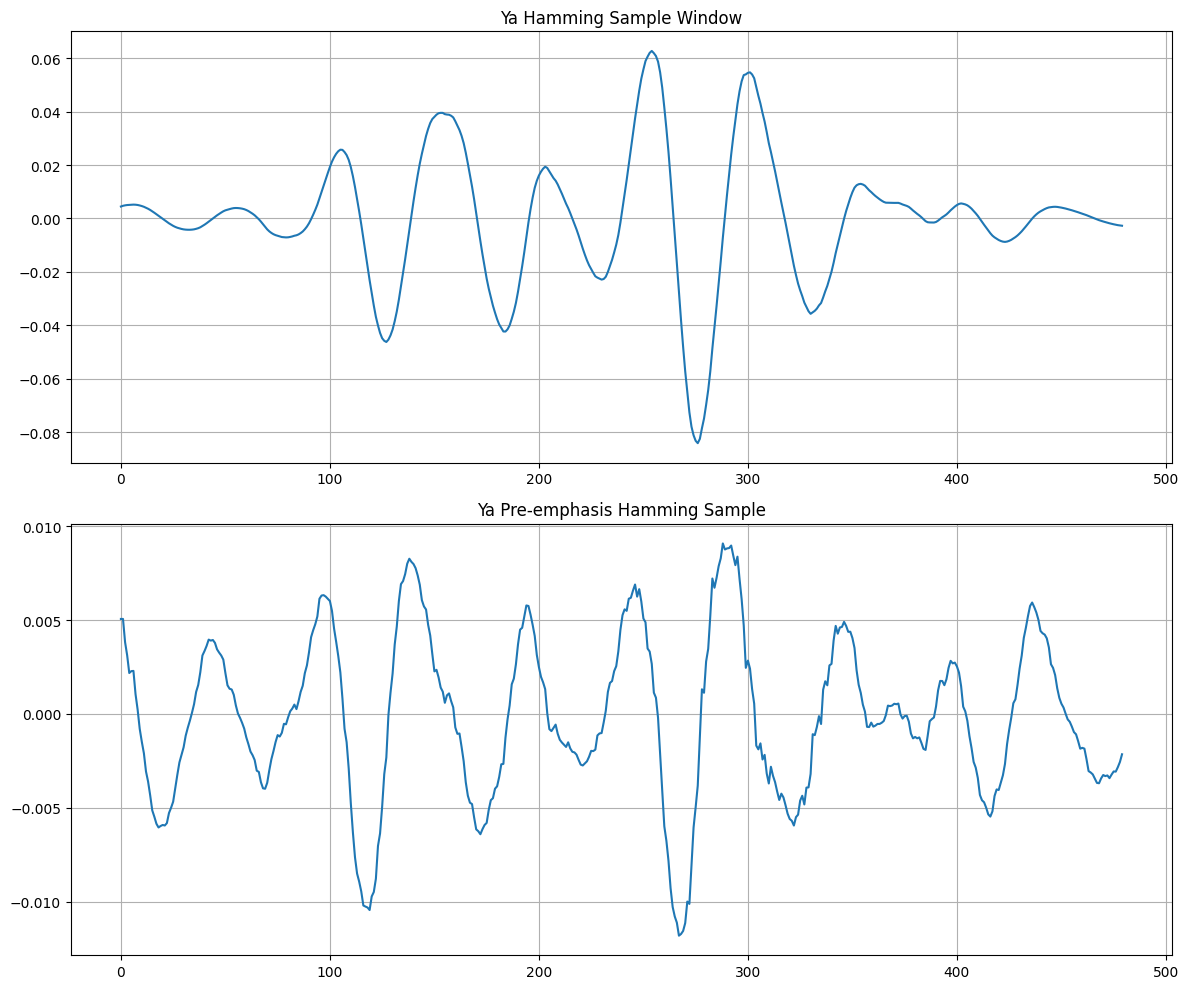

In [145]:
# Ya
plot_subplots(
    None,
    [
        {'data': [i for i in range(len(ya_hamming))],},
        {'data': [i for i in range(len(ya_hamming_pre_emphasis))],},
    ], 
    [
        {'data': ya_hamming, 'title': 'Ya Hamming Sample Window', 'grid': True},
        {'data': ya_hamming_pre_emphasis, 'title': 'Ya Pre-emphasis Hamming Sample', 'grid': True},
    ]
)

# step 05: ِApply FFT

In [146]:
N = 512

alif_hamming_fft = fft_real(alif_hamming, N = N)
alif_hamming_pre_emphasis_fft = fft_real(alif_hamming_pre_emphasis, N = N)
waw_hamming_fft = fft_real(waw_hamming, N = N)
waw_hamming_pre_emphasis_fft = fft_real(waw_hamming_pre_emphasis, N = N)
ya_hamming_fft = fft_real(ya_hamming, N = N)
ya_hamming_pre_emphasis_fft = fft_real(ya_hamming_pre_emphasis, N = N)

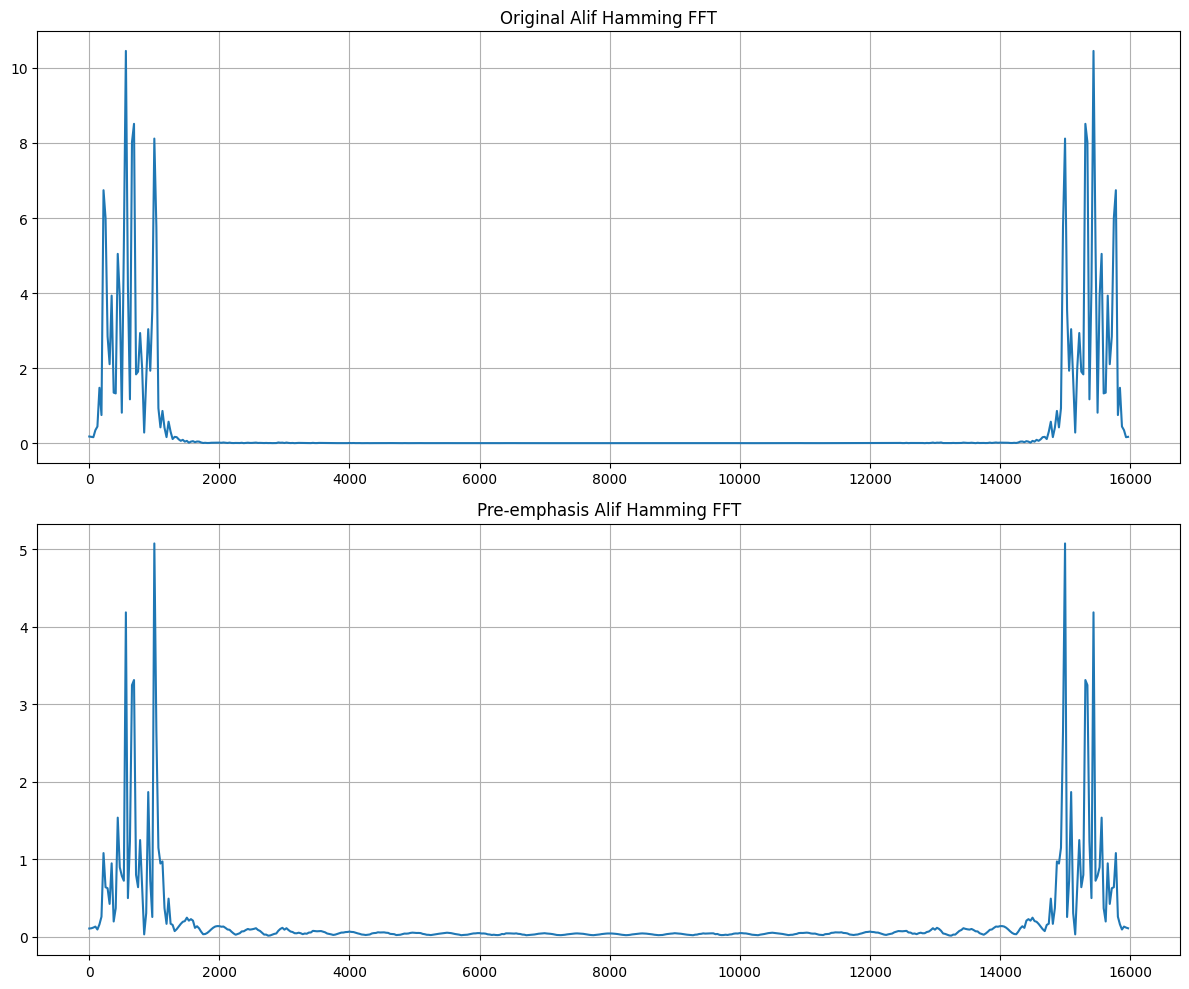

In [147]:
# alif
plot_subplots(
    None,
    [
        {'data': [i * fs / N for i in range(len(alif_hamming_fft))],},
        {'data': [i * fs / N for i in range(len(alif_hamming_pre_emphasis_fft))],},
    ], 
    [
        {'data': alif_hamming_fft, 'title': 'Original Alif Hamming FFT', 'grid': True},
        {'data': alif_hamming_pre_emphasis_fft, 'title': 'Pre-emphasis Alif Hamming FFT', 'grid': True},
    ]
)

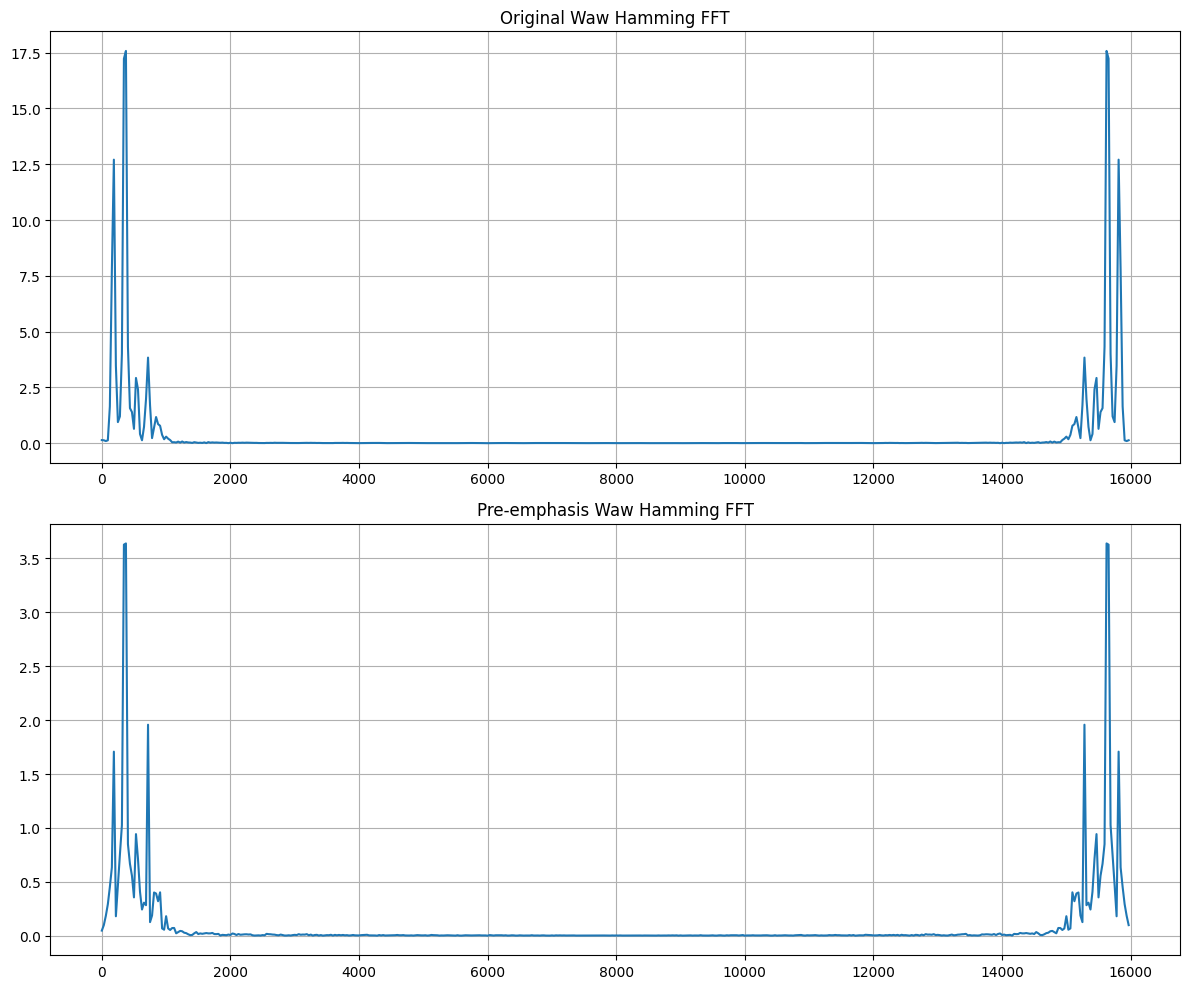

In [148]:
# waw
plot_subplots(
    None,
    [
        {'data': [i * fs / N for i in range(len(waw_hamming_fft))],},
        {'data': [i * fs / N for i in range(len(waw_hamming_pre_emphasis_fft))],},
    ], 
    [
        {'data': waw_hamming_fft, 'title': 'Original Waw Hamming FFT', 'grid': True},
        {'data': waw_hamming_pre_emphasis_fft, 'title': 'Pre-emphasis Waw Hamming FFT', 'grid': True},
    ]
)

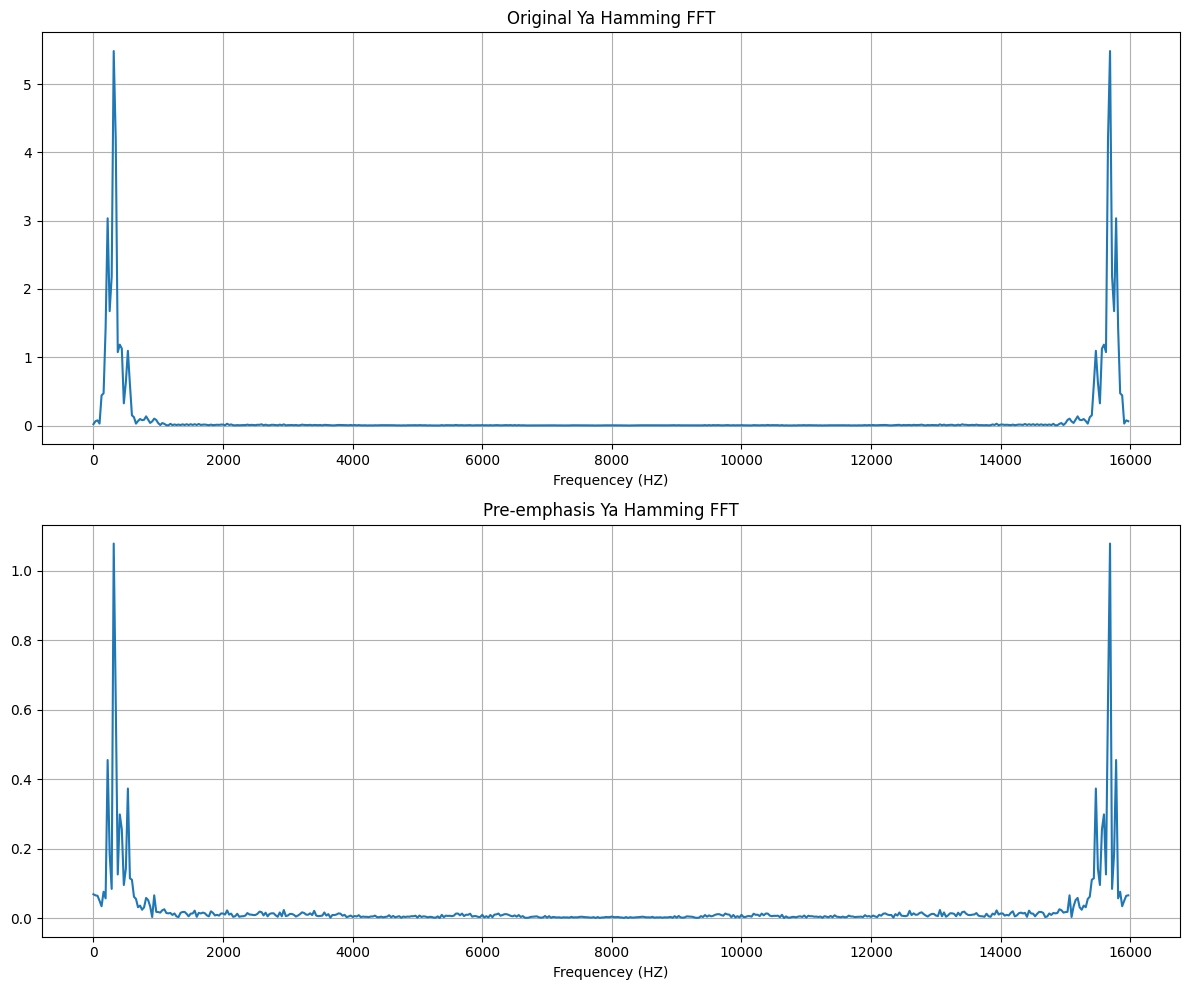

In [149]:
# Ya
plot_subplots(
    None,
    [
        {'data': [i * fs / N for i in range(len(ya_hamming_fft))],},
        {'data': [i * fs / N for i in range(len(ya_hamming_pre_emphasis_fft))],},
    ], 
    [
        {'data': ya_hamming_fft, 'title': 'Original Ya Hamming FFT', 'x_label': 'Frequencey (HZ)', 'grid': True},
        {'data': ya_hamming_pre_emphasis_fft, 'title': 'Pre-emphasis Ya Hamming FFT', 'x_label': 'Frequencey (HZ)','grid': True},
    ]
)

# setp 06: LPC

In [150]:
order = int(fs / 1000 + 2)

In [151]:
# Alif
alif_coeff = list(lpc(alif_hamming_pre_emphasis, order))
alif_envelope = [1 / abs(i) for i in fft_real(alif_coeff, N) ]
for i in range(1, len(alif_envelope)-1):
    if (alif_envelope[i] - alif_envelope[i-1]) * (alif_envelope[i+1] - alif_envelope[i]) <= 0 and (alif_envelope[i] - alif_envelope[i-1]) >= 0:
        print("LPC peak at", i, alif_envelope[i], i * fs / N)

LPC peak at 19 37.90779271395119 593.75
LPC peak at 32 44.65079976995235 1000.0
LPC peak at 98 0.8626834012483257 3062.5
LPC peak at 162 0.4878587539391292 5062.5
LPC peak at 191 0.431164143265417 5968.75
LPC peak at 224 0.4088096867281692 7000.0
LPC peak at 256 0.4041939285635363 8000.0
LPC peak at 288 0.4088096867281692 9000.0
LPC peak at 321 0.431164143265417 10031.25
LPC peak at 350 0.4878587539391292 10937.5
LPC peak at 414 0.8626834012483257 12937.5
LPC peak at 480 44.65079976995214 15000.0
LPC peak at 493 37.90779271395144 15406.25


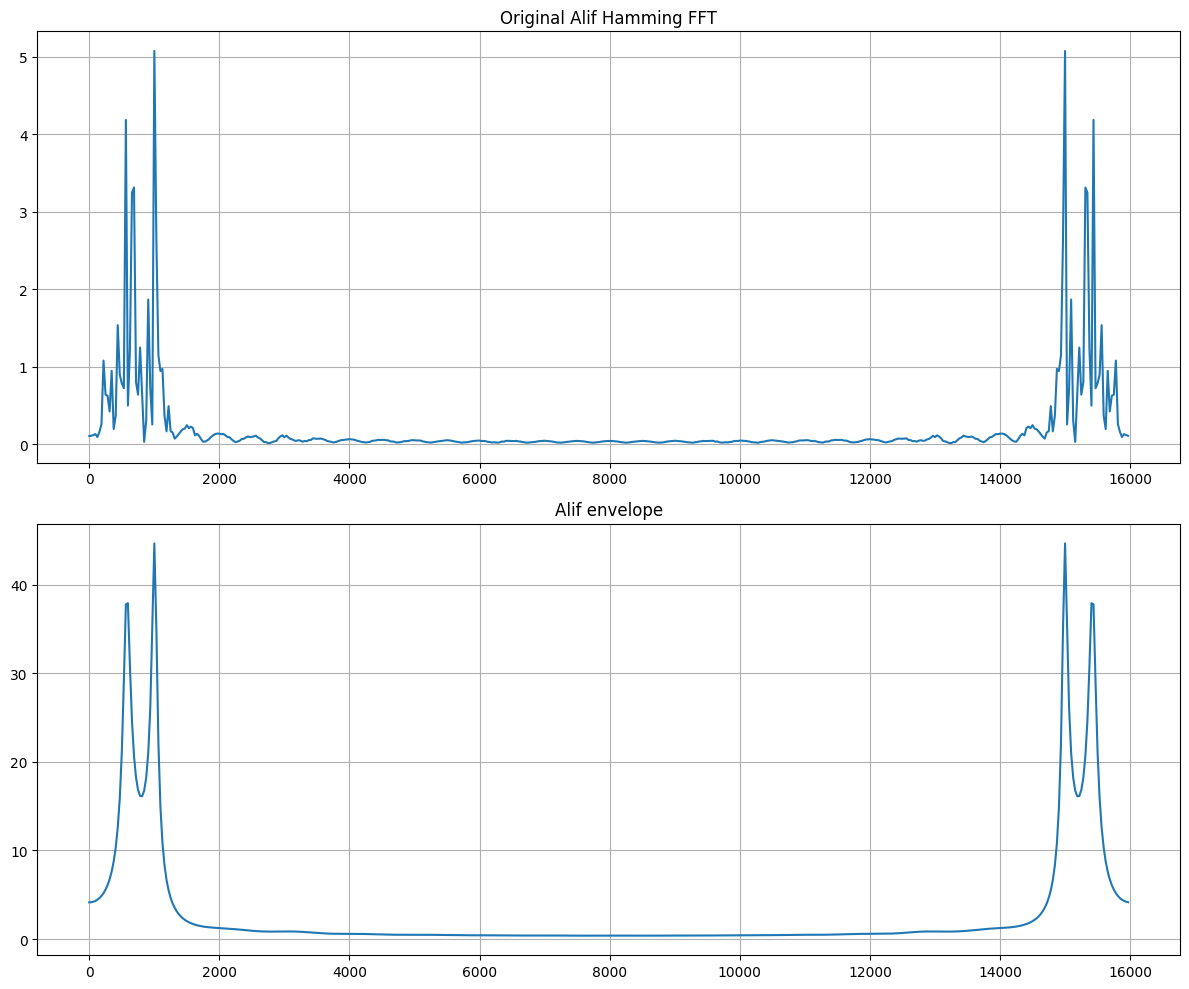

In [152]:
plot_subplots(
    None,
    [
        {'data': [i * fs / N for i in range(len(alif_hamming_pre_emphasis_fft))],},
        {'data': [i * fs / N for i in range(len(alif_envelope))],},
    ], 
    [
        {'data': alif_hamming_pre_emphasis_fft, 'title': 'Original Alif Hamming FFT', 'grid': True},
        {'data': alif_envelope, 'title': 'Alif envelope', 'grid': True},
    ]
)

In [153]:
alif_hamming_pre_emphasis_fft_db = [20 * math.log(i) for i in alif_hamming_pre_emphasis_fft]
alif_envelope_db = [20 * math.log(i) for i in alif_envelope]

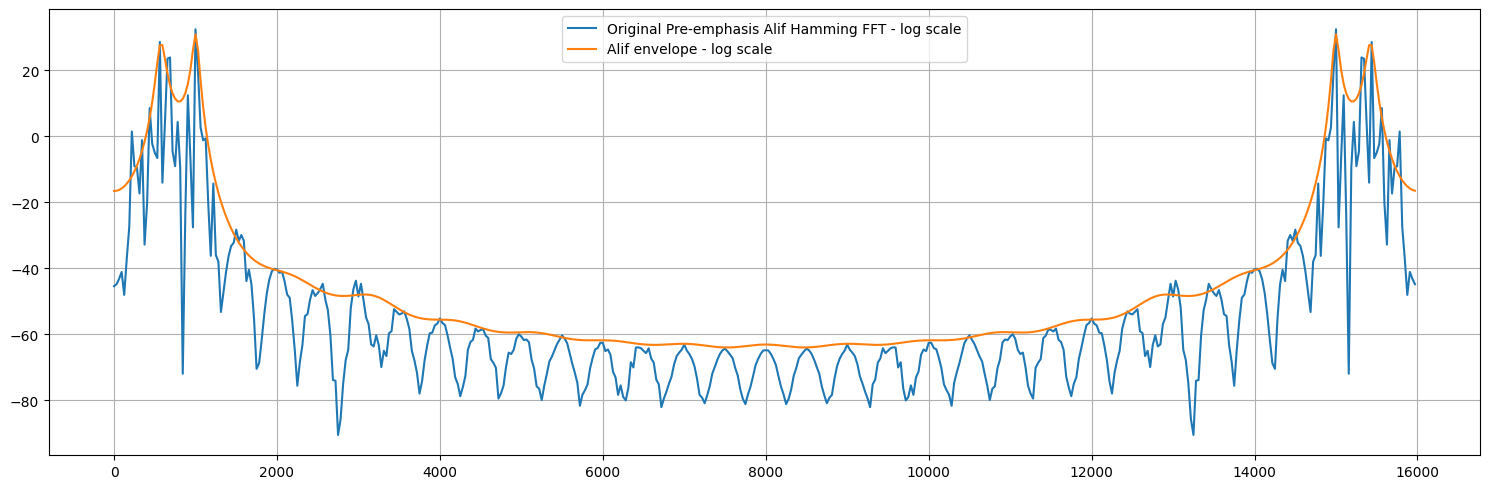

In [154]:
plt.figure(figsize=(15, 5))
plt.plot(
    [i * fs / N for i in range(len(alif_hamming_pre_emphasis_fft_db))],
    alif_hamming_pre_emphasis_fft_db,
    label='Original Pre-emphasis Alif Hamming FFT - log scale'
)

plt.plot(
    [i * fs / N for i in range(len(alif_envelope_db))],
    [i - 45 for i in alif_envelope_db],
    label='Alif envelope - log scale'
)

plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

In [155]:
# Waw
waw_coeff = list(lpc(waw_hamming_pre_emphasis, order))
waw_envelope = [1 / abs(i) for i in fft_real(waw_coeff, N) ]
for i in range(1, len(waw_envelope)-1):
    if (waw_envelope[i] - waw_envelope[i-1]) * (waw_envelope[i+1] - waw_envelope[i]) <= 0 and (waw_envelope[i] - waw_envelope[i-1]) >= 0:
        print("LPC peak at", i, waw_envelope[i], i * fs / N)


LPC peak at 11 371.4921528021708 343.75
LPC peak at 24 107.98649114679681 750.0
LPC peak at 96 0.9417359418710053 3000.0
LPC peak at 157 0.4249292151906007 4906.25
LPC peak at 195 0.36642179852593165 6093.75
LPC peak at 256 0.20914534511565464 8000.0
LPC peak at 317 0.3664217985259316 9906.25
LPC peak at 355 0.4249292151906007 11093.75
LPC peak at 416 0.9417359418710053 13000.0
LPC peak at 488 107.98649114679652 15250.0
LPC peak at 501 371.4921528021708 15656.25


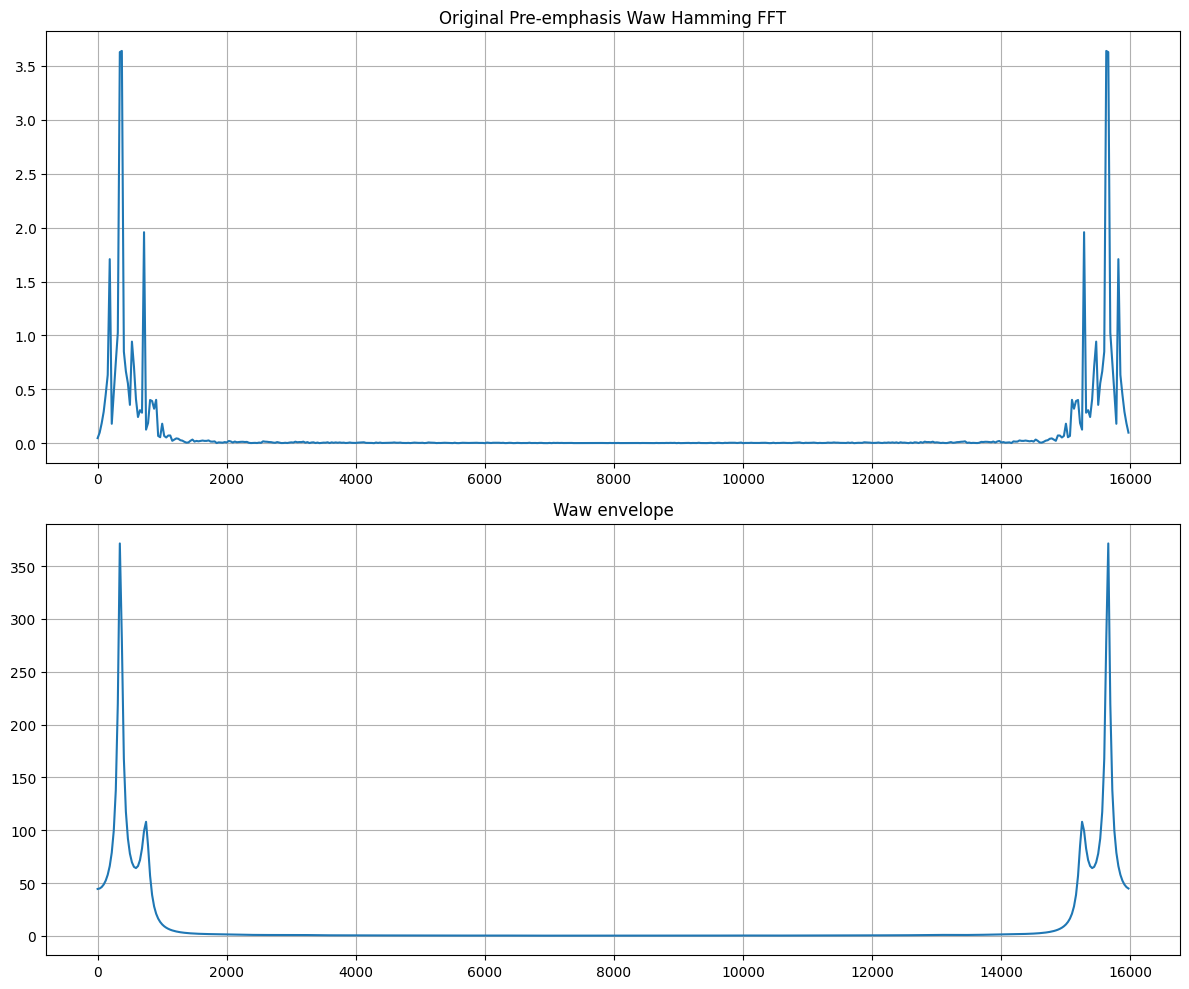

In [156]:
plot_subplots(
    "Waw_fft_" + file_name, 
    [
        {'data': [i * fs / N for i in range(len(waw_hamming_pre_emphasis_fft))],},
        {'data': [i * fs / N for i in range(len(waw_envelope))],},
    ], 
    [
        {'data': waw_hamming_pre_emphasis_fft, 'title': 'Original Pre-emphasis Waw Hamming FFT', 'grid': True},
        {'data': waw_envelope, 'title': 'Waw envelope', 'grid': True},
    ]
)

In [157]:
waw_hamming_pre_emphasis_fft_db = [20 * math.log(i) for i in waw_hamming_pre_emphasis_fft]
waw_envelope_db = [20 * math.log(i) for i in waw_envelope]

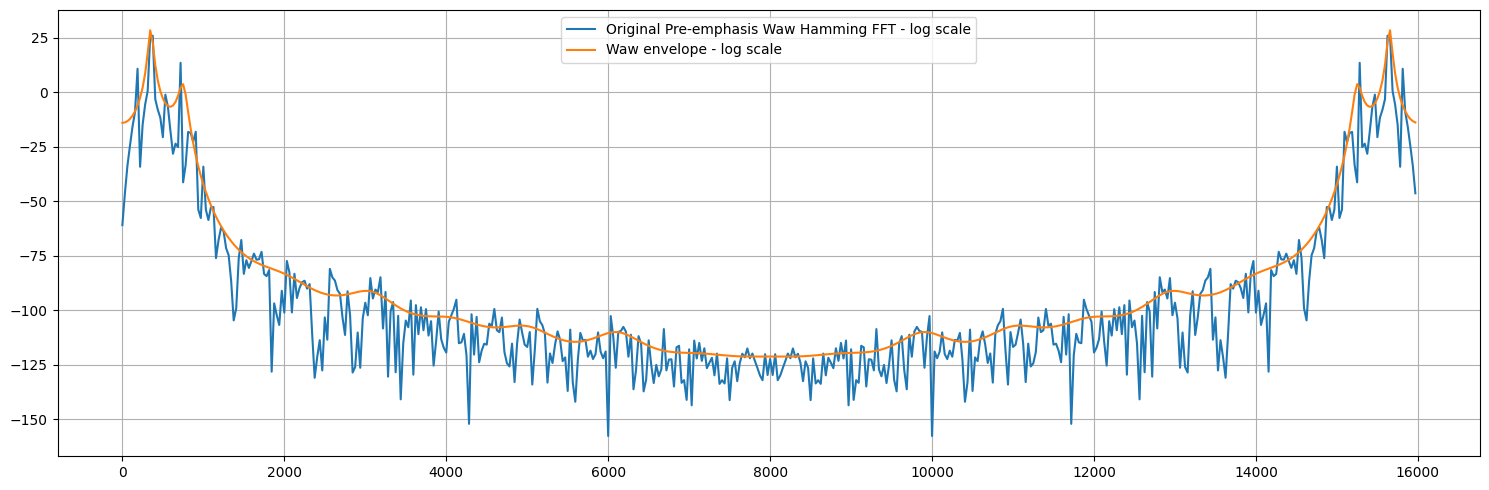

In [158]:
plt.figure(figsize=(15, 5))
plt.plot(
    [i * fs / N for i in range(len(waw_hamming_pre_emphasis_fft_db))],
    waw_hamming_pre_emphasis_fft_db,
    label='Original Pre-emphasis Waw Hamming FFT - log scale'
)

plt.plot(
    [i * fs / N for i in range(len(waw_envelope_db))],
    [i - 90 for i in waw_envelope_db],
    label='Waw envelope - log scale'
)

plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

In [159]:
# Ya
ya_coeff = list(lpc(ya_hamming_pre_emphasis, order))
ya_envelope = [1 / abs(i) for i in fft_real(ya_coeff, N) ]
for i in range(1, len(ya_envelope)-1):
    if (ya_envelope[i] - ya_envelope[i-1]) * (ya_envelope[i+1] - ya_envelope[i]) <= 0 and (ya_envelope[i] - ya_envelope[i-1]) >= 0:
        print("LPC peak at", i, ya_envelope[i], i * fs / N)

LPC peak at 11 84.1653170392851 343.75
LPC peak at 60 1.341170362156286 1875.0
LPC peak at 91 1.3785814610630138 2843.75
LPC peak at 114 1.2143399022934895 3562.5
LPC peak at 147 0.47059844944250967 4593.75
LPC peak at 182 1.0155000399089522 5687.5
LPC peak at 204 0.9839126488379493 6375.0
LPC peak at 239 0.2808461030814139 7468.75
LPC peak at 273 0.2808461030814139 8531.25
LPC peak at 308 0.9839126488379493 9625.0
LPC peak at 330 1.0155000399089522 10312.5
LPC peak at 365 0.47059844944250967 11406.25
LPC peak at 398 1.2143399022934895 12437.5
LPC peak at 421 1.3785814610630136 13156.25
LPC peak at 452 1.3411703621562856 14125.0
LPC peak at 501 84.16531703928513 15656.25


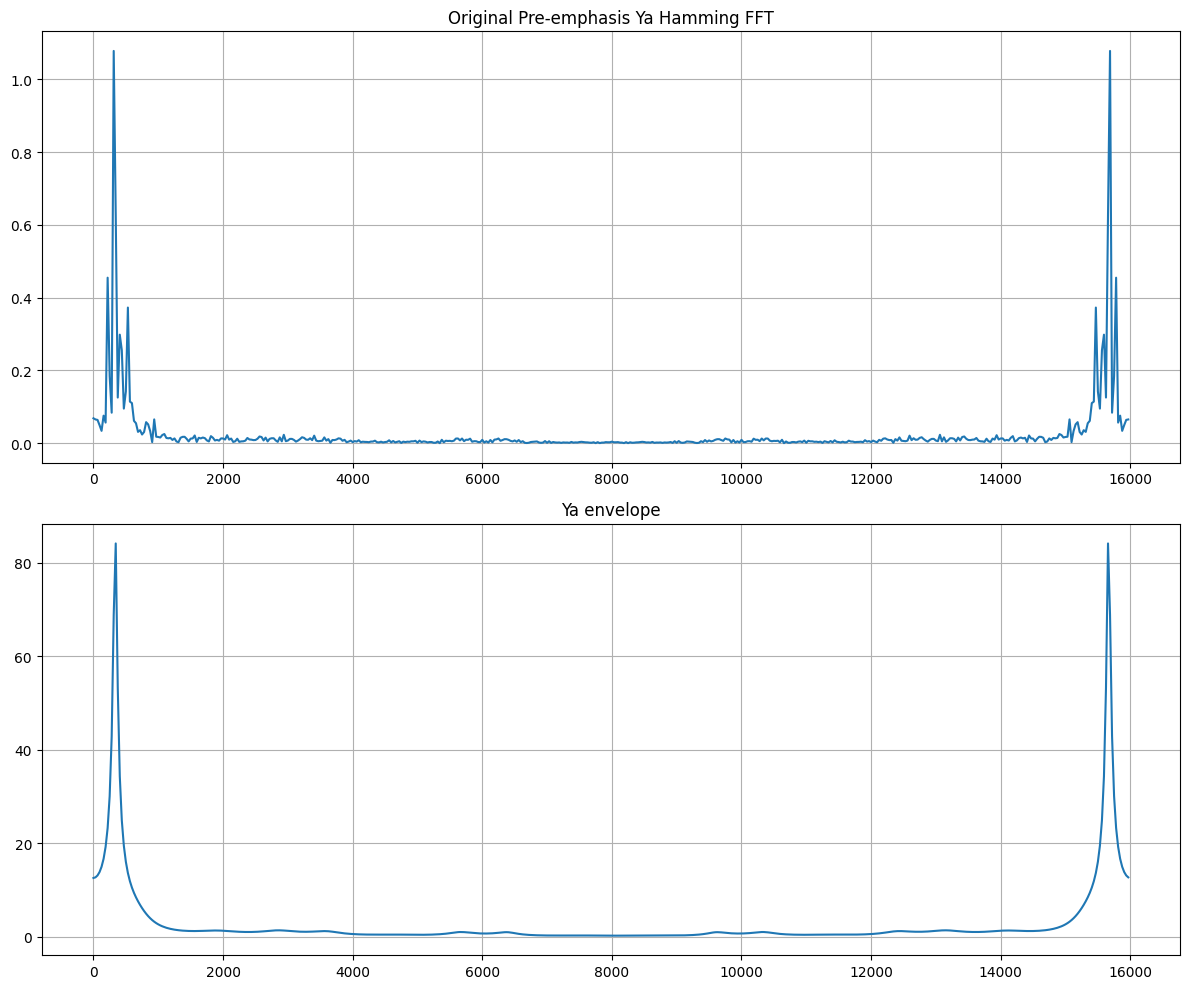

In [160]:
plot_subplots(
    None,
    [
        {'data': [i * fs / N for i in range(len(ya_hamming_pre_emphasis_fft))],},
        {'data': [i * fs / N for i in range(len(ya_envelope))],},
    ], 
    [
        {'data': ya_hamming_pre_emphasis_fft, 'title': 'Original Pre-emphasis Ya Hamming FFT', 'grid': True},
        {'data': ya_envelope, 'title': 'Ya envelope', 'grid': True},
    ]
)

In [161]:
ya_hamming_pre_emphasis_fft_db = [20 * math.log(i) for i in ya_hamming_pre_emphasis_fft]
ya_envelope_db = [20 * math.log(i) for i in ya_envelope]

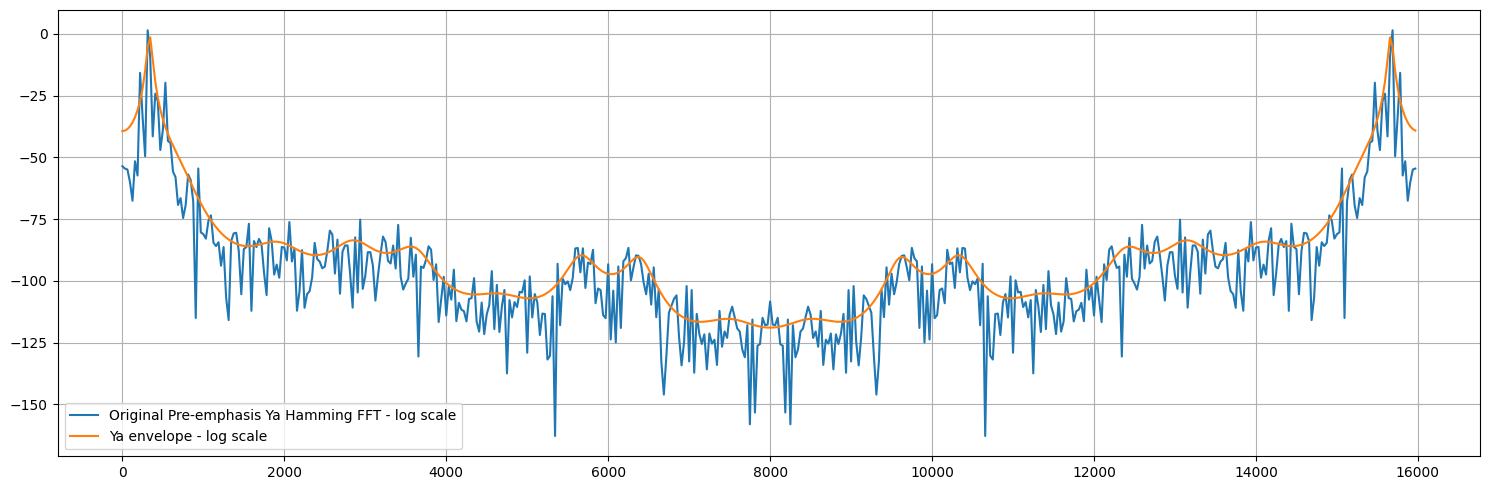

In [162]:
plt.figure(figsize=(15, 5))
plt.plot(
    [i * fs / N for i in range(len(ya_hamming_pre_emphasis_fft_db))],
    ya_hamming_pre_emphasis_fft_db,
    label='Original Pre-emphasis Ya Hamming FFT - log scale'
)

plt.plot(
    [i * fs / N for i in range(len(ya_envelope_db))],
    [i - 90 for i in ya_envelope_db],
    label='Ya envelope - log scale'
)

plt.tight_layout()
plt.legend()
plt.grid()
plt.show()